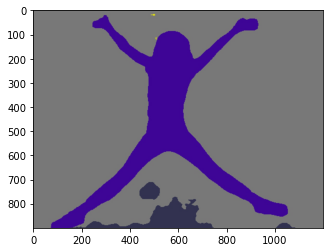

In [103]:
#imports
import numpy as nm
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

folder = r"C:\Users\phjlj\Documents\Datasets\Positions"
X_data, Y_data = [], []

def load(path, classification=None):
    for subdir, dirs, files in os.walk(path):
        for file in files: 
            X_data.append(cv2.imread(subdir + "\\" + file))
            Y_data.append([classification])


load(folder + "\\" + "Jumping", classification=0)
load(folder + "\\" + "Bell", classification=1)
load(folder + "\\" + "Stretch", classification=2)

In [126]:
def resize(array, IMG_SIZE=30):
    return_val = []
    for j in array:
        return_val.append(cv2.resize(j, (IMG_SIZE, IMG_SIZE)))
    return return_val
X_data = resize(X_data)
X_data = nm.array(X_data)
Y_data = nm.array(Y_data)

In [130]:
import tensorflow as tf
import sys

tf.keras.utils.normalize(X_data)
Net = tf.keras.models.Sequential()
Net.add(tf.keras.layers.Flatten())
Net.add(tf.keras.layers.Dense(130, activation="relu"))
Net.add(tf.keras.layers.Dense(130, activation="relu"))
Net.add(tf.keras.layers.Dense(130, activation="relu"))
Net.add(tf.keras.layers.Dense(3, activation="softmax"))
Net.compile(optimizer="adagrad", loss="sparse_categorical_crossentropy", metrics=["accuracy",])
Net.fit(X_data, Y_data, epochs=45)

print(Net.summary())

Epoch 1/45
1/1 [==============================] - 0s 997us/step - loss: 61.3287 - accuracy: 0.1905
Epoch 2/45
1/1 [==============================] - 0s 2ms/step - loss: 286.8438 - accuracy: 0.3333
Epoch 3/45
1/1 [==============================] - 0s 2ms/step - loss: 376.2536 - accuracy: 0.3333
Epoch 4/45
1/1 [==============================] - 0s 990us/step - loss: 62.1493 - accuracy: 0.3333
Epoch 5/45
1/1 [==============================] - 0s 995us/step - loss: 92.9798 - accuracy: 0.3333
Epoch 6/45
1/1 [==============================] - 0s 1ms/step - loss: 100.8556 - accuracy: 0.3333
Epoch 7/45
1/1 [==============================] - 0s 2ms/step - loss: 60.5665 - accuracy: 0.3333
Epoch 8/45
1/1 [==============================] - 0s 2ms/step - loss: 53.7190 - accuracy: 0.3333
Epoch 9/45
1/1 [==============================] - 0s 997us/step - loss: 15.4066 - accuracy: 0.4286
Epoch 10/45
1/1 [==============================] - 0s 997us/step - loss: 35.0668 - accuracy: 0.3333
Epoch 11/45
1/1 